### Importación de los módulos necesarios

In [21]:
import Alg_genetico_simple as alg_gen

# Algoritmo Genético Simple

In [4]:
""" 
Antes de hacer la llamada a la función que contiene el algoritmo es necesario realizar algunas definiciones previas de variables que va a 
utilizar dicho algoritmo, las cuales se pueden ir modificando para comprobar como funciona el algoritmo al modificar dichos parámetros.
"""

tamano_poblacion = 50
max_generaciones = 100
p_cruce = 0.9
p_mutacion = 0.1
mu = 15
lambd = 10


### Situación 1
Tipo de selección: Selección por torneo, con tamaño = 3

Tipo de cruce: Cruce de un punto

Tipo de mutación: Mutación Flip-Bit

Tipo de algoritmo: Algoritmo genético simple

In [14]:
# Comprobación del funcionamiento del algoritmo

poblacion_final1, logbook1 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selTournament", p_cruce, 
                                                              "cxOnePoint", p_mutacion, "mutFlipBit", "eaSimple", max_generaciones, mu, lambd, False)

C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseAjusteMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Calendario de cada enfermer@:
Enf_A : L L N M T T N 
Enf_B : T D L M L L N 
Enf_C : M L M T D L L 
Enf_D : N T M M T T T 
Enf_E : M M L M M T L 
Enf_F : L M M T N N T 
Enf_G : M N T L N L L 
Enf_H : M M T L L M L 
Enf_I : T L L T M L M 
Enf_J : L L L D N L M 
Enf_K : M M M T D L T 
Enf_L : L T T T L M L 
Enf_M : M L N L T M M 

Infracciones por turnos consecutivos =  8


Infracciones por turnos el mismo día =  4

Turnos por semana =  [5, 5, 5, 7, 5, 8, 5, 4, 5, 5, 8, 4, 5]
Infracciones de turnos por semana =  8

Enfermer@ por turno =  [6, 3, 1, 5, 3, 2, 4, 4, 2, 5, 5, 2, 4, 3, 5, 3, 3, 1, 3, 4, 3]
Infracciones por enfermer@ por turno =  8

Preferencias no cumplidas:  [0, 0, 0, 0]
Infracciones por preferencias de turnos =  0



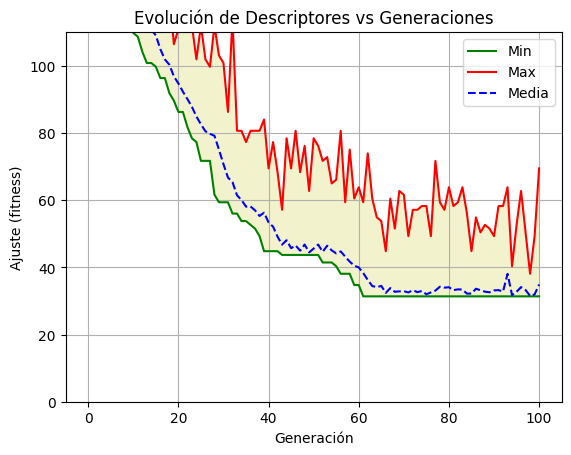

In [16]:
alg_gen.plot_evolucion(logbook1)

## Situación 2

Tipo de selección: Selección por torneo, con tamaño = 3

Tipo de cruce: Cruce de dos puntos

Tipo de mutación: Mutación Flip-Bit

Tipo de algoritmo: Algoritmo genético simple

In [17]:
poblacion_final2, logbook2 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selTournament", p_cruce, 
                                                              "cxTwoPoint", p_mutacion, "mutFlipBit", "eaSimple", max_generaciones, mu, lambd, False)

C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseAjusteMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Calendario de cada enfermer@:
Enf_A : T M L T D N L 
Enf_B : L L M M L T M 
Enf_C : T D L M T T T 
Enf_D : L M T L M M T 
Enf_E : M M N M M M N 
Enf_F : L T L M L M M 
Enf_G : T L M L M N L 
Enf_H : N T T L L N L 
Enf_I : L L M T T T M 
Enf_J : M M M T L N T 
Enf_K : M N L M T L N 
Enf_L : M N N N N L L 
Enf_M : N T N L T M L 

Infracciones por turnos consecutivos =  6


Infracciones por turnos el mismo día =  2

Turnos por semana =  [6, 5, 8, 5, 7, 5, 5, 4, 5, 7, 5, 5, 5]
Infracciones de turnos por semana =  8

Enfermer@ por turno =  [4, 4, 2, 5, 3, 3, 4, 3, 3, 5, 5, 1, 4, 4, 2, 4, 3, 5, 3, 3, 2]
Infracciones por enfermer@ por turno =  7

Preferencias no cumplidas:  [0, 0, 0, 0]
Infracciones por preferencias de turnos =  0



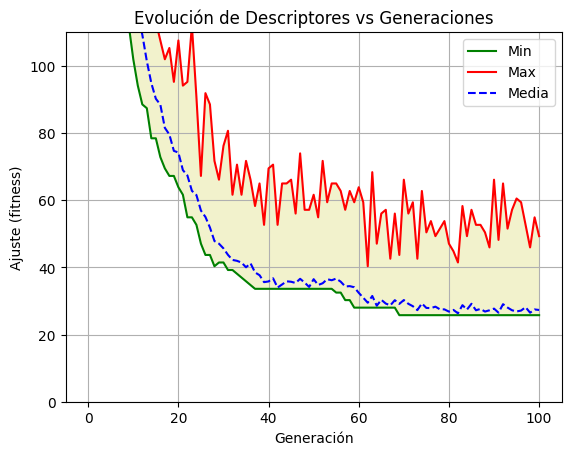

In [18]:
alg_gen.plot_evolucion(logbook2)

## Situación 3

Tipo de selección: Selección por torneo, con tamaño = 3

Tipo de cruce: Cruce uniforme

Tipo de mutación: Mutación Flip-Bit

Tipo de algoritmo: Algoritmo genético simple

In [22]:
poblacion_final3, logbook3 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selTournament", p_cruce, 
                                                              "cxUniform", p_mutacion, "mutFlipBit", "eaSimple", max_generaciones, mu, lambd, False)

C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseAjusteMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


TypeError: cxUniform() missing 1 required positional argument: 'indpb'

In [23]:
alg_gen.plot_evolucion(logbook3)

NameError: name 'logbook3' is not defined

## Situación 4

Tipo de selección: Selección por torneo, con tamaño = 3

Tipo de cruce: Cruce en representación de orden

Tipo de mutación: Mutación Flip-Bit

Tipo de algoritmo: Algoritmo genético simple

In [25]:
poblacion_final4, logbook4 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selTournament", p_cruce, 
                                                              "cxOrdered", p_mutacion, "mutFlipBit", "eaSimple", max_generaciones, mu, lambd, False)

C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseAjusteMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Calendario de cada enfermer@:
Enf_A : T L N L T T T 
Enf_B : N L M T T L L 
Enf_C : L T L M M L L 
Enf_D : L M D L M L N 
Enf_E : L T T L T M N 
Enf_F : M L M L N T L 
Enf_G : M N L T M L T 
Enf_H : T L L T L N L 
Enf_I : T T L L M N M 
Enf_J : L M M M L L M 
Enf_K : N L L N N L T 
Enf_L : L M L N T T L 
Enf_M : L M L M L M M 

Infracciones por turnos consecutivos =  5


Infracciones por turnos el mismo día =  1

Turnos por semana =  [5, 5, 3, 5, 5, 5, 5, 3, 5, 5, 4, 4, 5]
Infracciones de turnos por semana =  0

Enfermer@ por turno =  [2, 3, 2, 4, 3, 1, 4, 3, 2, 3, 4, 2, 4, 4, 2, 2, 4, 2, 3, 3, 2]
Infracciones por enfermer@ por turno =  7

Preferencias no cumplidas:  [0, 0, 0, 0]
Infracciones por preferencias de turnos =  0



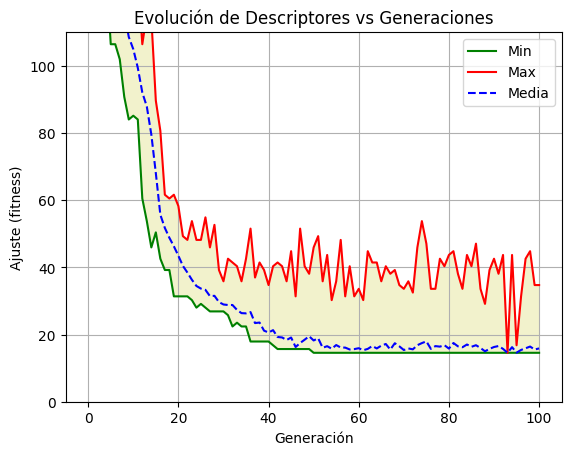

In [26]:
alg_gen.plot_evolucion(logbook4)

## Situación 5

Tipo de selección: Selección por torneo, con tamaño = 3

Tipo de cruce: Cruce de un punto

Tipo de mutación: Mutación de Mezcla de Índices (Shuffle)

Tipo de algoritmo: Algoritmo genético simple

In [27]:
poblacion_final5, logbook5 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selTournament", p_cruce, 
                                                              "cxOnePoint", p_mutacion, "mutShuffleIndexes", "eaSimple", max_generaciones, mu, lambd, False)

C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseAjusteMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


TypeError: mutShuffleIndexes() missing 1 required positional argument: 'indpb'

In [28]:
alg_gen.plot_evolucion(logbook5)

NameError: name 'logbook5' is not defined

## Situación 6

Tipo de selección: Selección por torneo, con tamaño = 3

Tipo de cruce: Cruce de un punto

Tipo de mutación: Mutación de Inversión

Tipo de algoritmo: Algoritmo genético simple

In [41]:
poblacion_final6, logbook6 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selTournament", p_cruce, 
                                                              "cxOnePoint", p_mutacion, "mutInversion", "eaSimple", max_generaciones, mu, lambd, False)

C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseAjusteMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Calendario de cada enfermer@:
Enf_A : L D T M N D M 
Enf_B : L L L M L T M 
Enf_C : L M L T M M L 
Enf_D : T M L L L L M 
Enf_E : M L M L M L N 
Enf_F : L M N N L T L 
Enf_G : L T M T T L L 
Enf_H : M L T N L L N 
Enf_I : N L L L M M M 
Enf_J : T T L M M L T 
Enf_K : T M D L N N T 
Enf_L : M L M M T M M 
Enf_M : N T L L M L L 

Infracciones por turnos consecutivos =  11


Infracciones por turnos el mismo día =  3

Turnos por semana =  [11, 3, 5, 5, 4, 4, 4, 4, 4, 5, 7, 7, 4]
Infracciones de turnos por semana =  10

Enfermer@ por turno =  [3, 3, 2, 5, 4, 2, 4, 3, 2, 4, 3, 2, 5, 3, 2, 4, 3, 2, 5, 4, 2]
Infracciones por enfermer@ por turno =  1

Preferencias no cumplidas:  [0, 0, 0, 0]
Infracciones por preferencias de turnos =  0



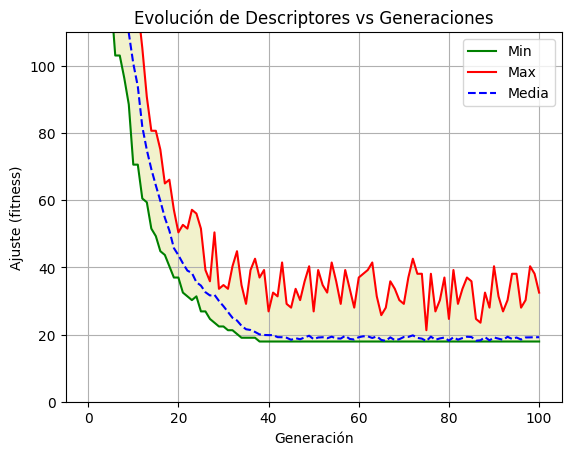

In [30]:
alg_gen.plot_evolucion(logbook6)

## Situación 7

Tipo de selección: Selección por torneo, con tamaño = 3

Tipo de cruce: Cruce de un punto

Tipo de mutación: Mutación de Flip - Bit

Tipo de algoritmo: Algoritmo MuPlusLambda

In [45]:
poblacion_final7, logbook7 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selTournament", p_cruce, 
                                                              "cxOnePoint", p_mutacion, "mutInversion", "eaMuPlusLambda", max_generaciones, mu, lambd,False)

C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseAjusteMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


TypeError: eaMuPlusLambda() got an unexpected keyword argument 'lambd'

In [ ]:
alg_gen.plot_evolucion(logbook6)

## Situación 8

Tipo de selección: Selección por torneo, con tamaño = 3

Tipo de cruce: Cruce de un punto

Tipo de mutación: Mutación de Flip Bit

Tipo de algoritmo: Algoritmo simple con Elitismo

In [48]:
poblacion_final8, logbook8 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selTournament", p_cruce, 
                                                              "cxOnePoint", p_mutacion, "mutFlipBit", "eaSimpleWithElitism", max_generaciones, mu, lambd, False)

C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseAjusteMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Calendario de cada enfermer@:
Enf_A : T L M L N L L 
Enf_B : N L L M T T N 
Enf_C : M N L N M T M 
Enf_D : T N T L T L T 
Enf_E : L T L M L L N 
Enf_F : L T T T M T D 
Enf_G : L L M T M T D 
Enf_H : N L M M L M M 
Enf_I : M M N N L M T 
Enf_J : T L T L M T M 
Enf_K : N L L L T L T 
Enf_L : T T L M M N L 
Enf_M : T L M M T L M 

Infracciones por turnos consecutivos =  8


Infracciones por turnos el mismo día =  2

Turnos por semana =  [5, 5, 7, 5, 3, 7, 6, 5, 6, 7, 3, 5, 6]
Infracciones de turnos por semana =  9

Enfermer@ por turno =  [2, 5, 5, 1, 3, 2, 4, 4, 2, 5, 2, 2, 5, 5, 1, 2, 5, 2, 6, 3, 4]
Infracciones por enfermer@ por turno =  14

Preferencias no cumplidas:  [0, 0, 0, 0]
Infracciones por preferencias de turnos =  0



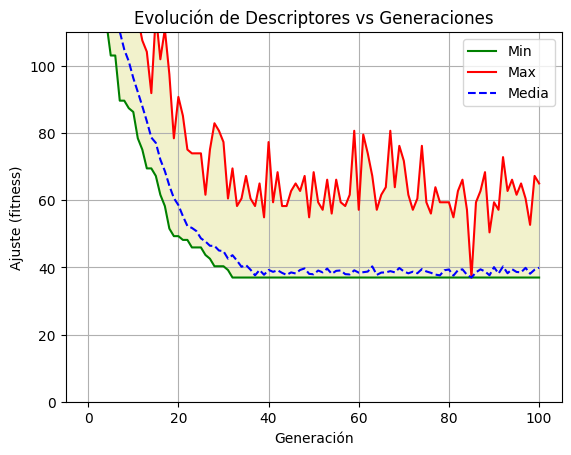

In [49]:
alg_gen.plot_evolucion(logbook8)

## Situación 9

Tipo de selección: Selección de los K - mejores

Tipo de cruce: Cruce de un punto

Tipo de mutación: Mutación de Flip - Bit

Tipo de algoritmo: Algoritmo genético simple

In [50]:
poblacion_final9, logbook9 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selBest", p_cruce, 
                                                              "cxOnePoint", p_mutacion, "mutFlipBit", "eaSimple", max_generaciones, mu, lambd, False)

C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseAjusteMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Calendario de cada enfermer@:
Enf_A : L N M M L N T 
Enf_B : L T T M L T M 
Enf_C : T D L L L M T 
Enf_D : T L L N T L T 
Enf_E : L M T N M L T 
Enf_F : M T T M M M T 
Enf_G : L D M N D M L 
Enf_H : D L D L M L N 
Enf_I : T M T M M M D 
Enf_J : M D L T L T L 
Enf_K : T L M N M M T 
Enf_L : N L D T M L L 
Enf_M : N M D T L L M 

Infracciones por turnos consecutivos =  20


Infracciones por turnos el mismo día =  9

Turnos por semana =  [6, 6, 6, 5, 5, 8, 8, 8, 9, 6, 6, 6, 6]
Infracciones de turnos por semana =  20

Enfermer@ por turno =  [3, 6, 5, 6, 2, 4, 6, 4, 3, 4, 4, 5, 7, 3, 1, 5, 3, 1, 3, 7, 3]
Infracciones por enfermer@ por turno =  19

Preferencias no cumplidas:  [0, 0, 0, 0]
Infracciones por preferencias de turnos =  0



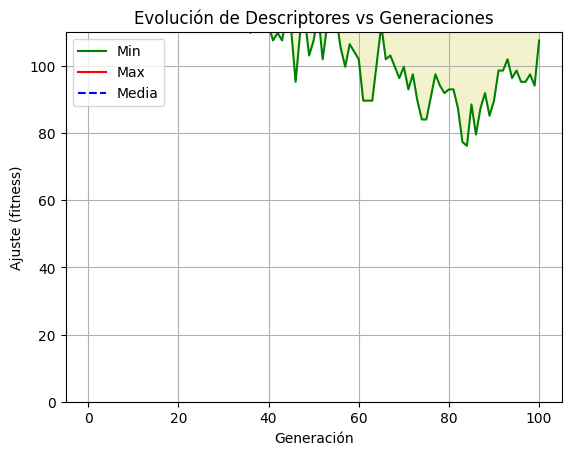

In [51]:
alg_gen.plot_evolucion(logbook9)

## Situación 10

Tipo de selección: Selección de los K - mejores

Tipo de cruce: Cruce de dos puntos

Tipo de mutación: Mutación de Flip-Bit

Tipo de algoritmo: Algoritmo genético simple

In [52]:
poblacion_final10, logbook10 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selBest", p_cruce, 
                                                              "cxTwoPoint", p_mutacion, "mutFlipBit", "eaSimple", max_generaciones, mu, lambd, False)

C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseAjusteMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Calendario de cada enfermer@:
Enf_A : N L T T N L L 
Enf_B : L T T M T N T 
Enf_C : T N N M N L T 
Enf_D : T L M L N T M 
Enf_E : M M M M L D L 
Enf_F : L N N L N T M 
Enf_G : L M L M D L L 
Enf_H : L M L T L N L 
Enf_I : D M L L T N L 
Enf_J : T T T D L L M 
Enf_K : N L M L M T M 
Enf_L : D M L T T M T 
Enf_M : N T M L L L M 

Infracciones por turnos consecutivos =  14


Infracciones por turnos el mismo día =  5

Turnos por semana =  [4, 6, 7, 6, 8, 5, 5, 4, 5, 7, 7, 8, 4]
Infracciones de turnos por semana =  14

Enfermer@ por turno =  [3, 3, 5, 5, 5, 2, 4, 3, 2, 5, 5, 2, 2, 4, 5, 2, 4, 4, 5, 5, 1]
Infracciones por enfermer@ por turno =  14

Preferencias no cumplidas:  [0, 0, 0, 0]
Infracciones por preferencias de turnos =  0



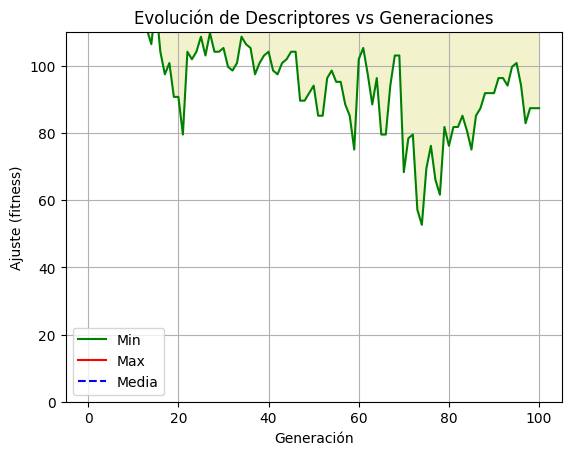

In [53]:
alg_gen.plot_evolucion(logbook10)

## Situación 11

Tipo de selección: Selección de los K - mejores

Tipo de cruce: Cruce uniforme

Tipo de mutación: Mutación de Flip - Bit
Tipo de algoritmo: Algoritmo genético simple

In [54]:
poblacion_final11, logbook11 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selBest", p_cruce, 
                                                              "cxUniform", p_mutacion, "mutFlipBit", "eaSimple", max_generaciones, mu, lambd, False)

C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseAjusteMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


TypeError: cxUniform() missing 1 required positional argument: 'indpb'

In [ ]:
alg_gen.plot_evolucion(logbook11)

## Situación 12

Tipo de selección: Selección de los K - mejores

Tipo de cruce: Cruce en representación de Orden

Tipo de mutación: Mutación de Flip - Bit

Tipo de algoritmo: Algoritmo genético simple

In [55]:
poblacion_final12, logbook12 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selBest", p_cruce, 
                                                              "cxOrdered", p_mutacion, "mutFlipBit", "eaSimple", max_generaciones, mu, lambd, False)

C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseAjusteMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Calendario de cada enfermer@:
Enf_A : T L T T M T L 
Enf_B : M N T L M M L 
Enf_C : M M L L L N L 
Enf_D : L M M L T T M 
Enf_E : D M T T M L M 
Enf_F : T L N L N D T 
Enf_G : L T T L M M M 
Enf_H : L N N L L T M 
Enf_I : M D M L N L L 
Enf_J : M L T N L T T 
Enf_K : M N T N L D T 
Enf_L : T D D M L M T 
Enf_M : L T L M L M N 

Infracciones por turnos consecutivos =  22


Infracciones por turnos el mismo día =  6

Turnos por semana =  [7, 6, 3, 8, 8, 7, 7, 5, 5, 6, 7, 10, 6]
Infracciones de turnos por semana =  22

Enfermer@ por turno =  [6, 4, 3, 5, 3, 6, 3, 7, 5, 2, 3, 2, 4, 2, 3, 6, 5, 5, 4, 5, 2]
Infracciones por enfermer@ por turno =  18

Preferencias no cumplidas:  [0, 0, 0, 0]
Infracciones por preferencias de turnos =  0



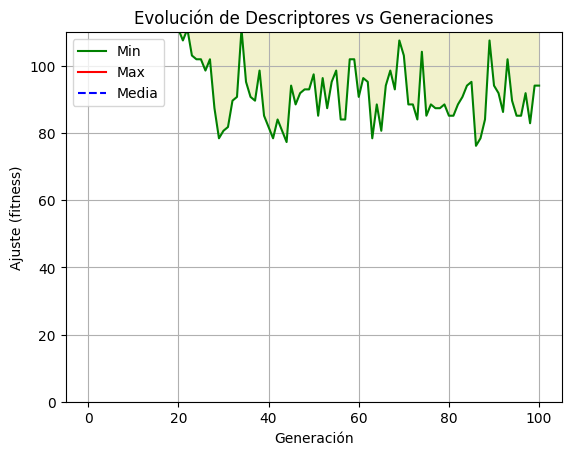

In [56]:
alg_gen.plot_evolucion(logbook12)

## Situación 13

Tipo de selección: Selección de los K - Mejores

Tipo de cruce: Cruce de un punto

Tipo de mutación: Mutación de mezcla de Índices

Tipo de algoritmo: Algoritmo genético simple

In [57]:
poblacion_final13, logbook13 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selBest", p_cruce, 
                                                              "cxOnePoint", p_mutacion, "mutShuffleIndexes", "eaSimple", max_generaciones, mu, lambd, False)

C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseAjusteMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


TypeError: mutShuffleIndexes() missing 1 required positional argument: 'indpb'

In [58]:
alg_gen.plot_evolucion(logbook13)

NameError: name 'logbook13' is not defined

## Situación 14

Tipo de selección: Selección de los K - Mejores

Tipo de cruce: Cruce de un punto

Tipo de mutación: Mutación de Inversión

Tipo de algoritmo: Algoritmo genético simple

In [60]:
poblacion_final14, logbook14 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selBest", p_cruce, 
                                                              "cxOnePoint", p_mutacion, "mutInversion", "eaSimple", max_generaciones, mu, lambd, False)

C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseAjusteMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Calendario de cada enfermer@:
Enf_A : T M N L L M L 
Enf_B : N T M L L T N 
Enf_C : L D L T M M L 
Enf_D : T M M M M D L 
Enf_E : M M L T L N L 
Enf_F : L T M N L T M 
Enf_G : N L T M M T M 
Enf_H : L M M T M D L 
Enf_I : M N N T L M M 
Enf_J : T L T D L T L 
Enf_K : T N L L T T T 
Enf_L : N T N T L L T 
Enf_M : L L T M L T L 

Infracciones por turnos consecutivos =  17


Infracciones por turnos el mismo día =  4

Turnos por semana =  [4, 6, 7, 8, 5, 6, 9, 7, 8, 5, 6, 6, 3]
Infracciones de turnos por semana =  18

Enfermer@ por turno =  [2, 5, 3, 5, 5, 4, 4, 4, 3, 4, 5, 4, 4, 3, 0, 5, 6, 6, 3, 4, 1]
Infracciones por enfermer@ por turno =  17

Preferencias no cumplidas:  [0, 0, 0, 0]
Infracciones por preferencias de turnos =  0



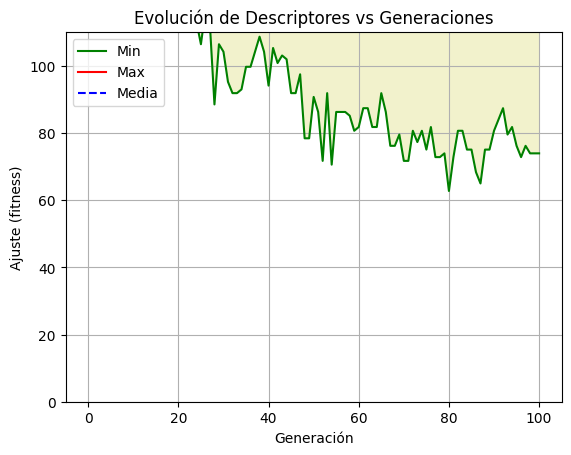

In [61]:
alg_gen.plot_evolucion(logbook14)

## Situación 15

Tipo de selección: Selección de los K - Mejores

Tipo de cruce: Cruce de un punto

Tipo de mutación: Mutación de Flip - Bit

Tipo de algoritmo: Algoritmo genético MuPlusLamba

In [62]:
poblacion_final15, logbook15 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selBest", p_cruce, 
                                                              "cxOnePoint", p_mutacion, "mutFlipBit", "eaMuPlusLamba", max_generaciones, mu, lambd, False)

C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseAjusteMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\paula\anaconda3\envs\practica_3_env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'ClaseIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


IndexError: list index out of range

In [ ]:
alg_gen.plot_evolucion(logbook15)

In [40]:
## Situación 16

Tipo de selección: Selección de los K - Mejores

Tipo de cruce: Cruce de un punto

Tipo de mutación: Mutación de Flip - Bit

Tipo de algoritmo: Algoritmo genético simple con Eliti

SyntaxError: invalid syntax (2750771445.py, line 3)

In [ ]:
poblacion_final6, logbook6 = alg_gen.CreaccionCalendarioTurnos ("./data/datos_enfermeria.txt", tamano_poblacion, "selTournament", p_cruce, 
                                                              "cxOrdered", p_mutacion, "mutInversion", "eaSimple", max_generaciones, mu, lambd, False)

In [ ]:
alg_gen.plot_evolucion(logbook6)